In [27]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import RobotManyDofs
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint
from ppr.sampling import get_shortest_path

In [62]:
# ROBOT
robot1 = RobotManyDofs(8, link_length=1)

# PATH
#dx    = TolerancedNumber(2, 0.3, 0.8, samples=3)
dx    = np.ones(5) * 3
dy    = np.linspace(1.3, 2.5, 5)
angle = TolerancedNumber(0.0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([dx[i], dy[i], angle]) for i in range(5)]

# COLLISION SCENE
sc1 = [Rectangle(0.2, 0.2, 2.5, 1, 0),
       Rectangle(-1, 0, 0.8, 3, 0),
       Rectangle(3.2, 0, 0.8, 3, 0),
       Rectangle(0, -0.2, 4, 0.1, 0)]

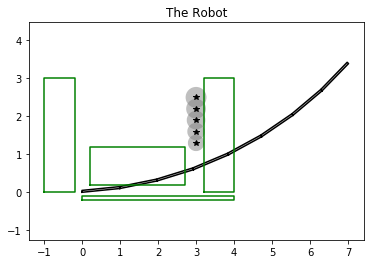

In [63]:
q_random = [0.1] * 8

fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, q_random, 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
plt.show()

In [64]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)

In [65]:
print([len(qp) for qp in path_js])

[4, 5, 2, 3, 5]


In [66]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
[3 1 1 0 0]
True


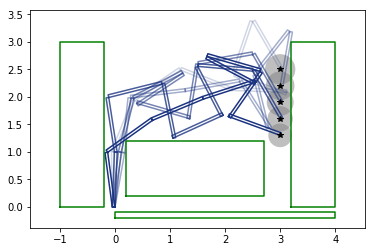

In [67]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()